In [1]:
import pandas as pd
import numpy as np
import os
import tifffile as tiff
import matplotlib.pyplot as plt
import sys
sys.path.append('/root/capsule')
from merquaco import pixel_classification as pc
from merquaco import data_processing as dp
from skimage.filters import threshold_otsu

In [2]:
exps = os.listdir('/root/capsule/data/dev_mouse_data/') + os.listdir('/root/capsule/data/mouse_atlas/')

1199650968


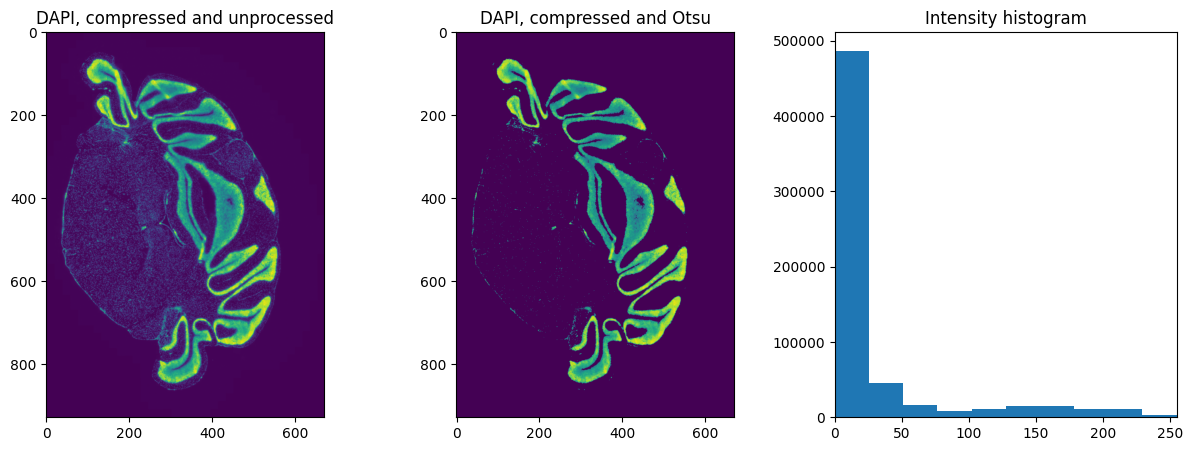

1199651060


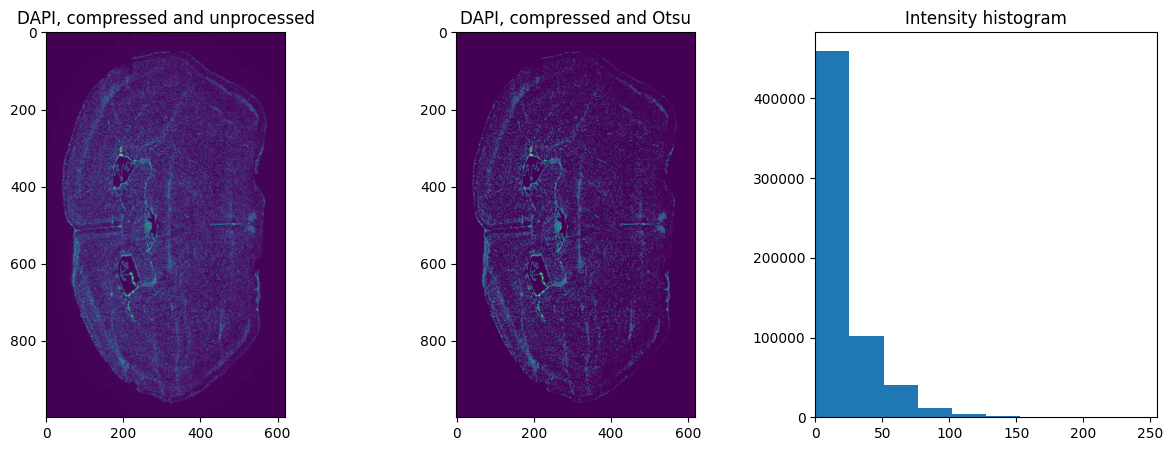

1296400356


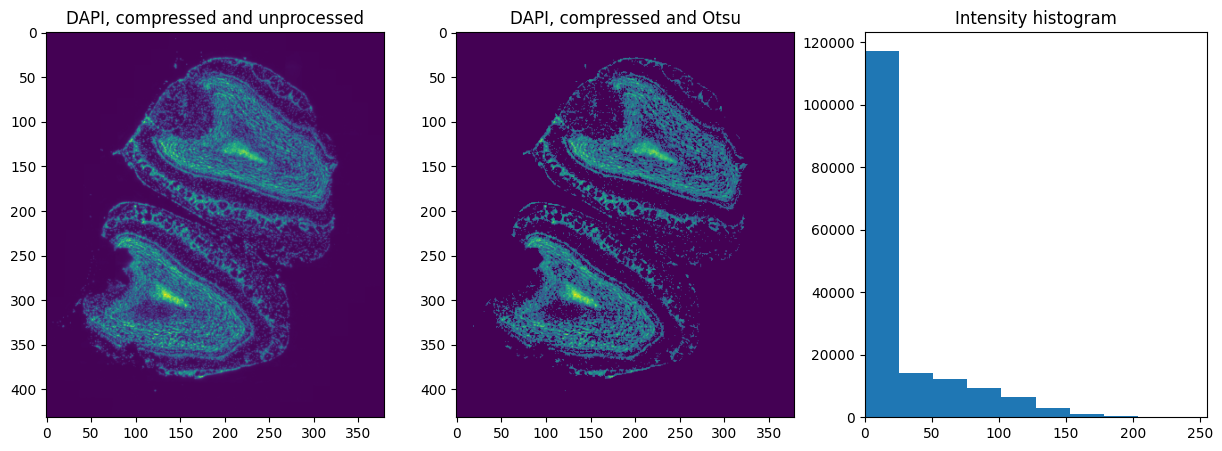

1199650953


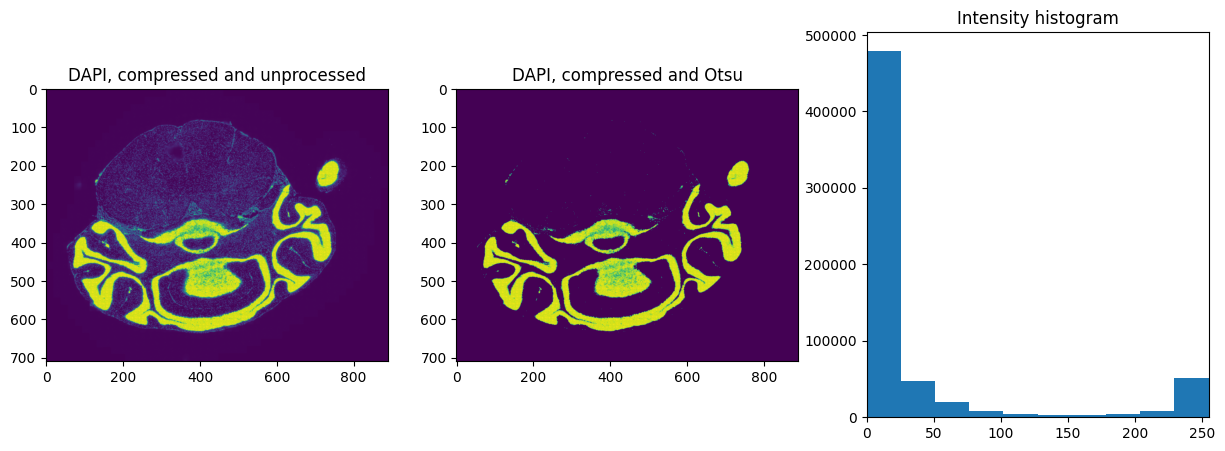

1253032503


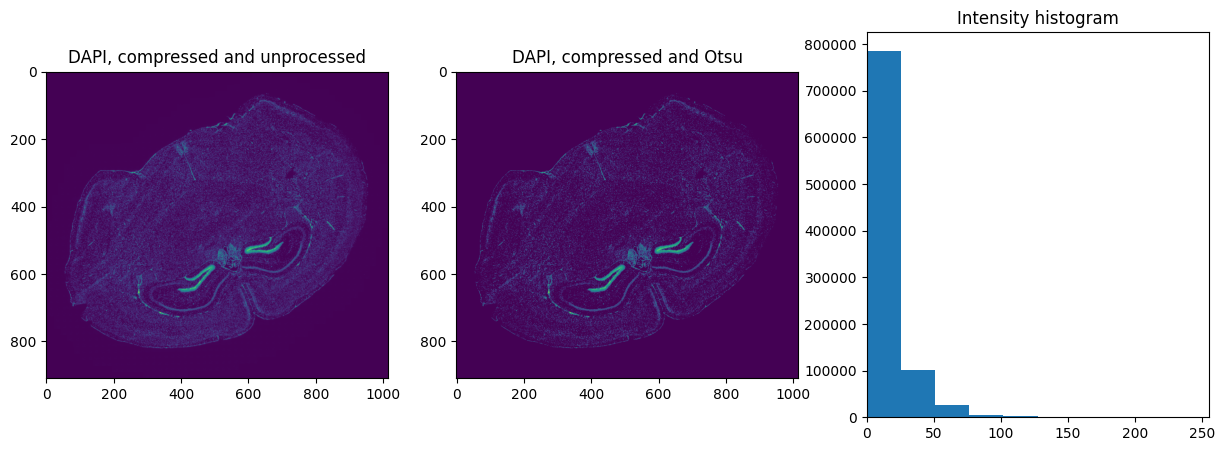

1333384149


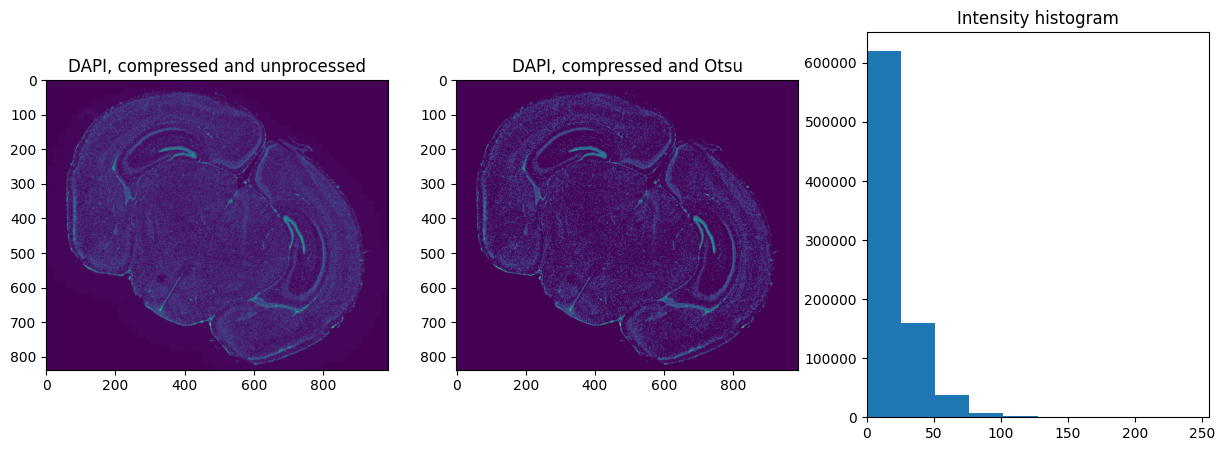

1297657417


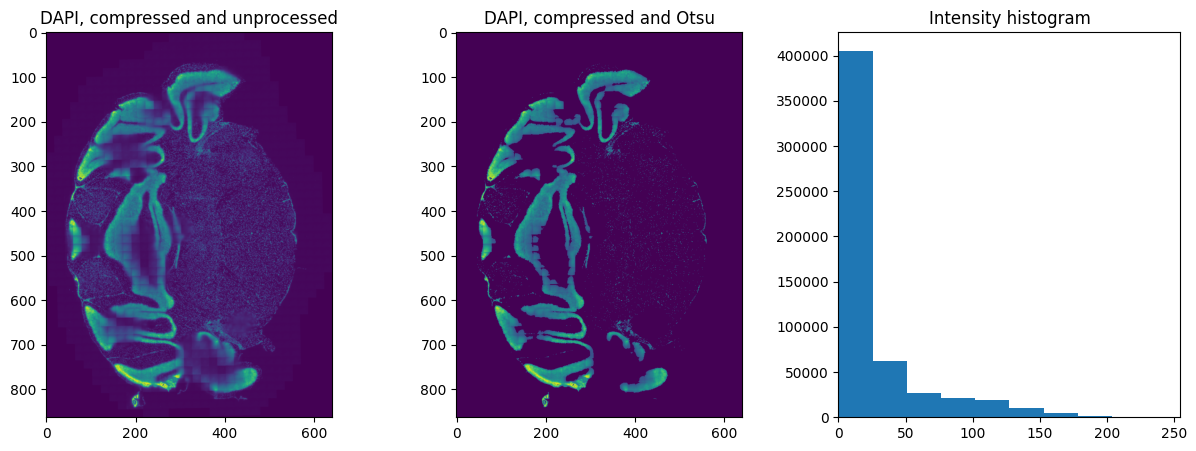

1326007653


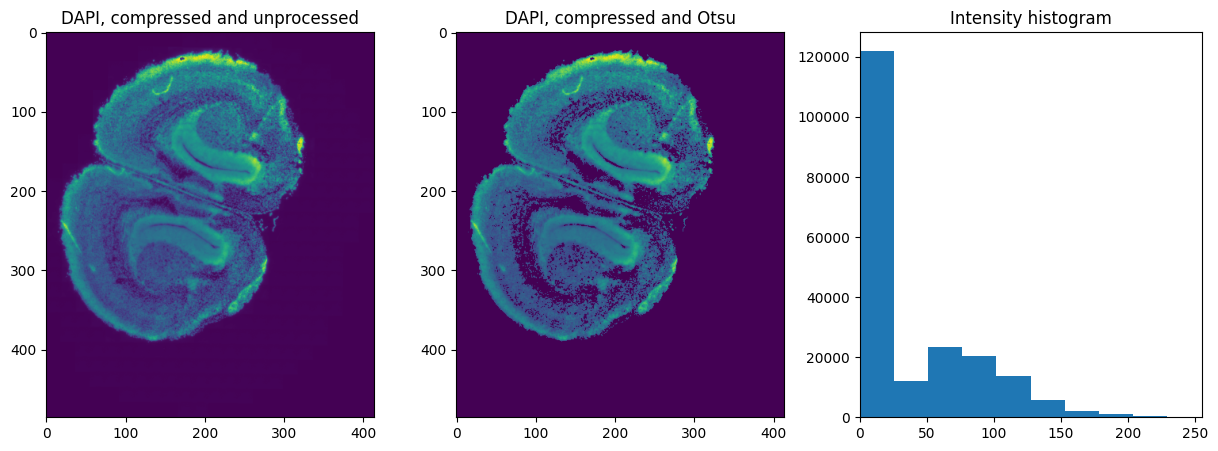

1199651005


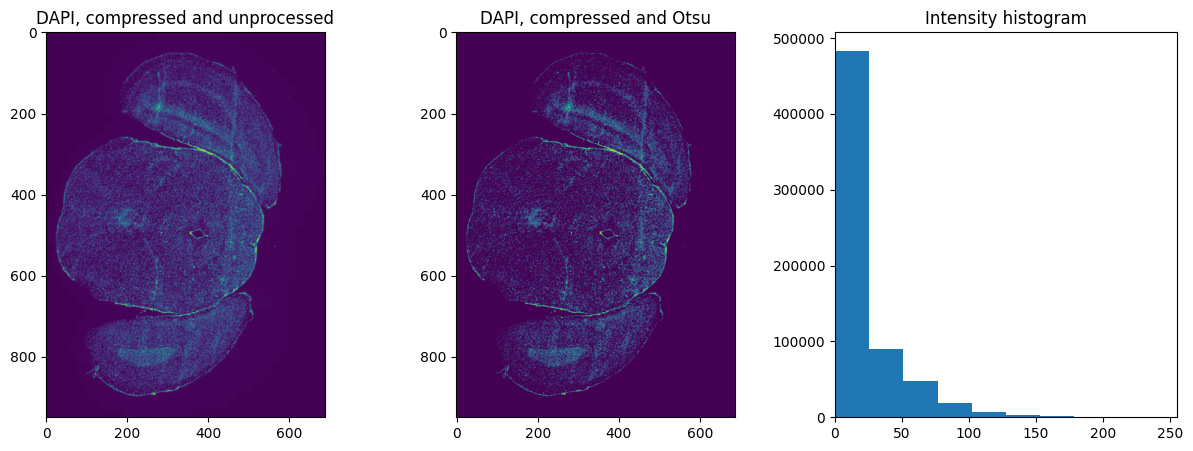

1199651109


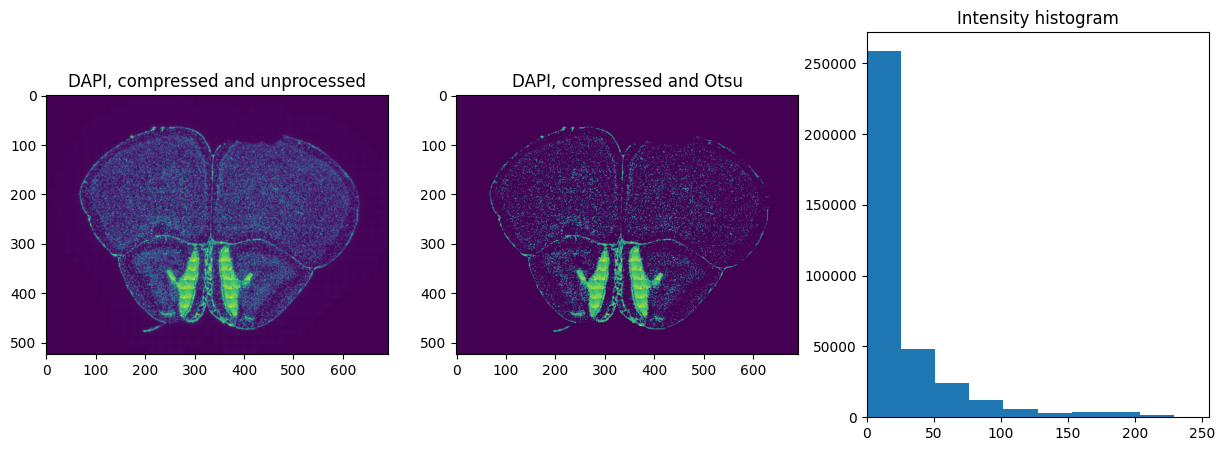

1199650959


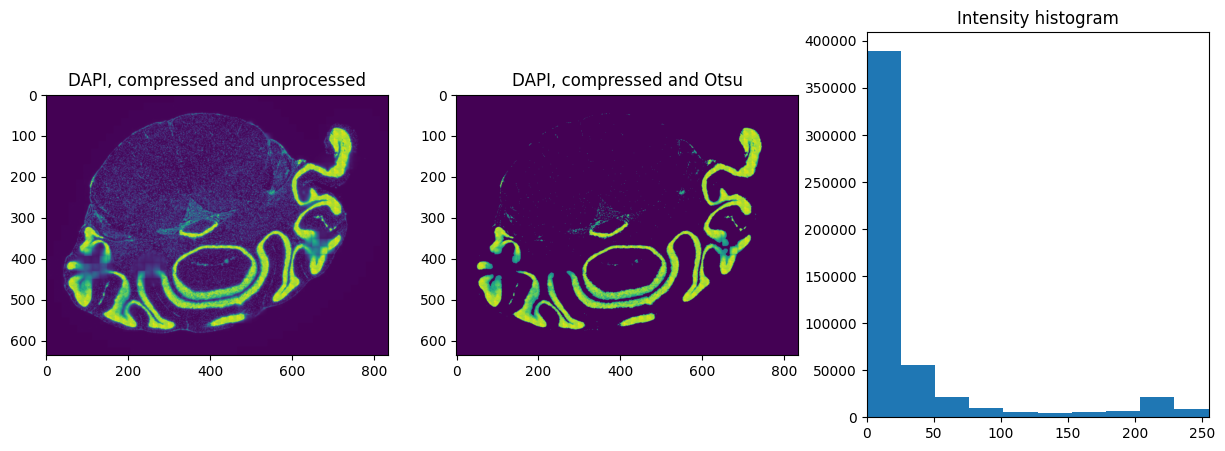

1344856232


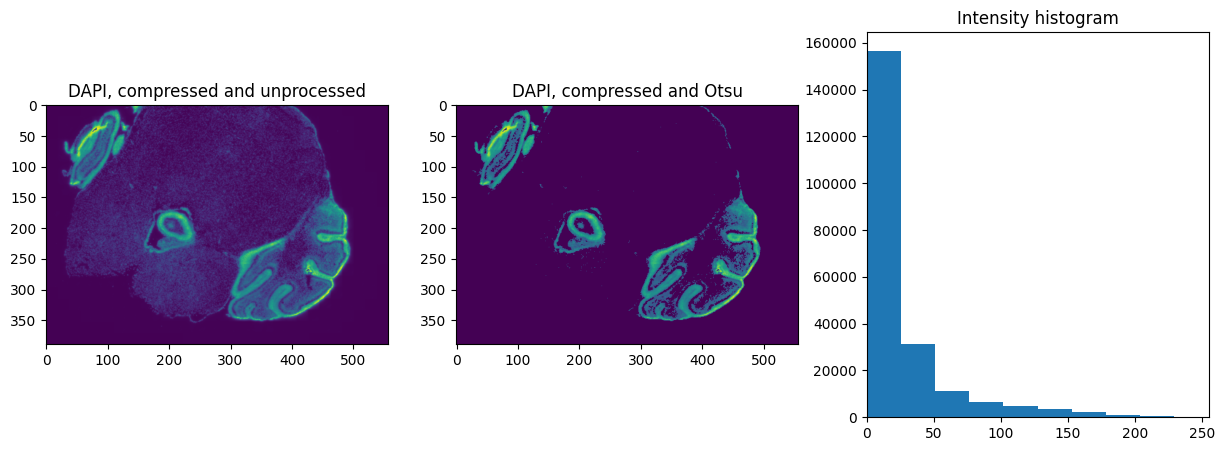

1198980590


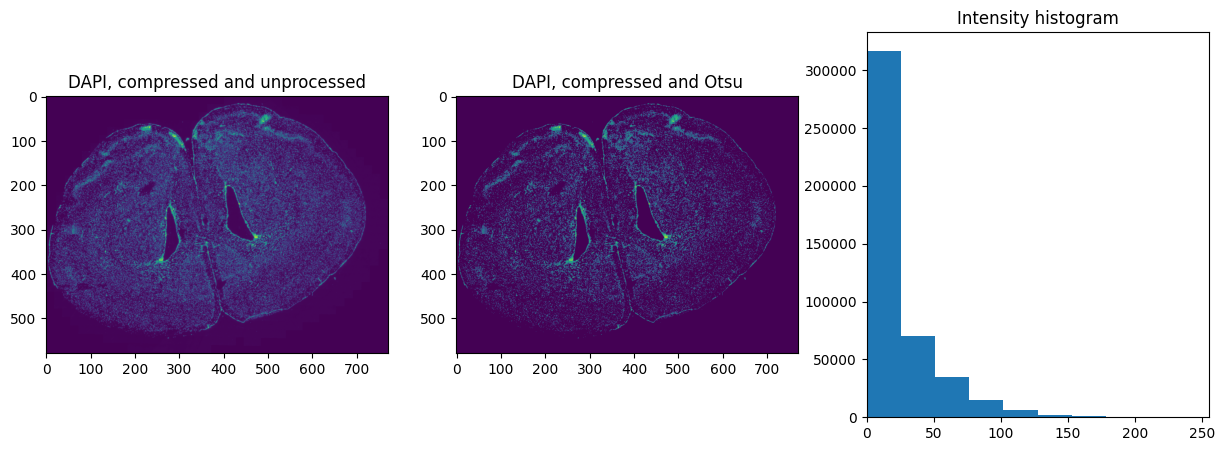

1344858391


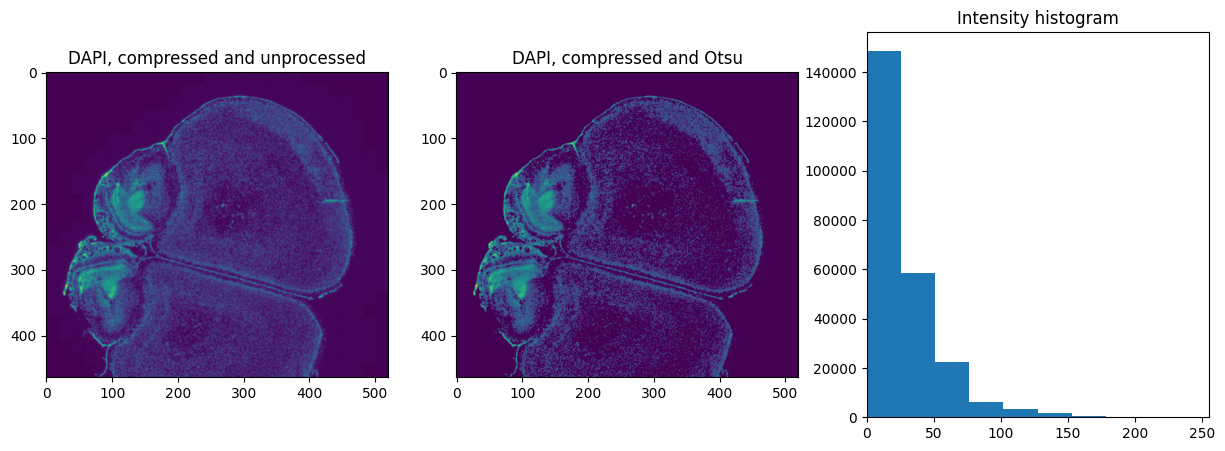

1403967823


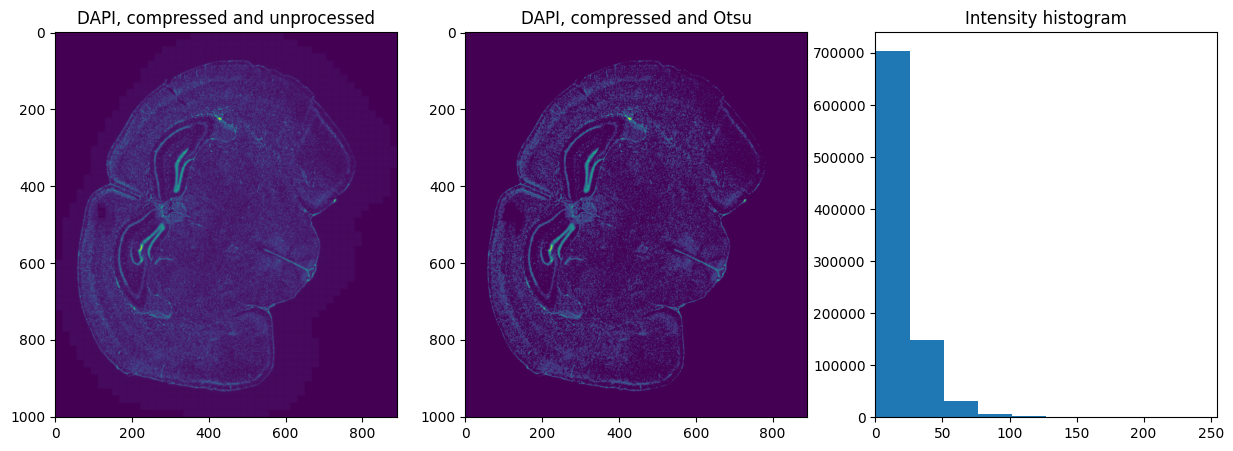

1198980493


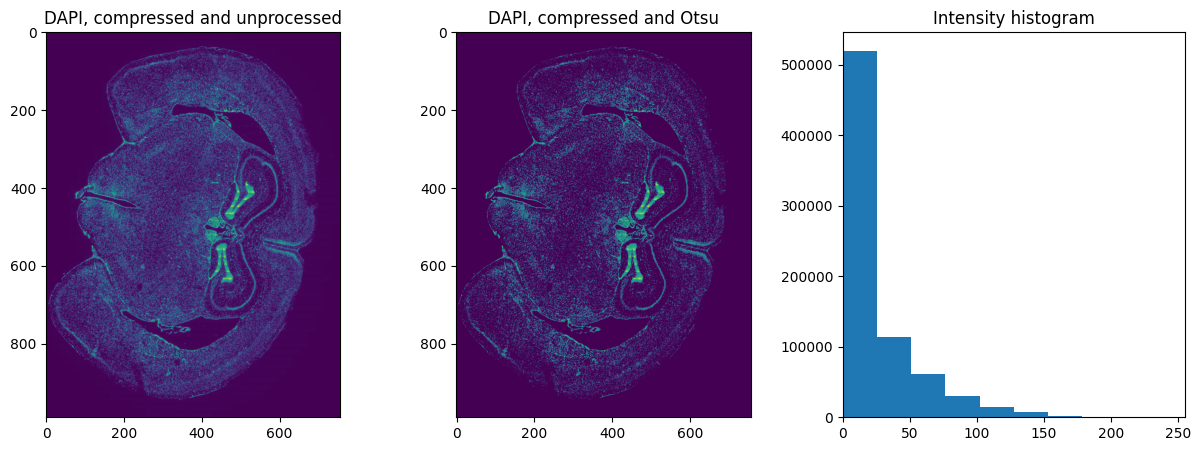

1198980101


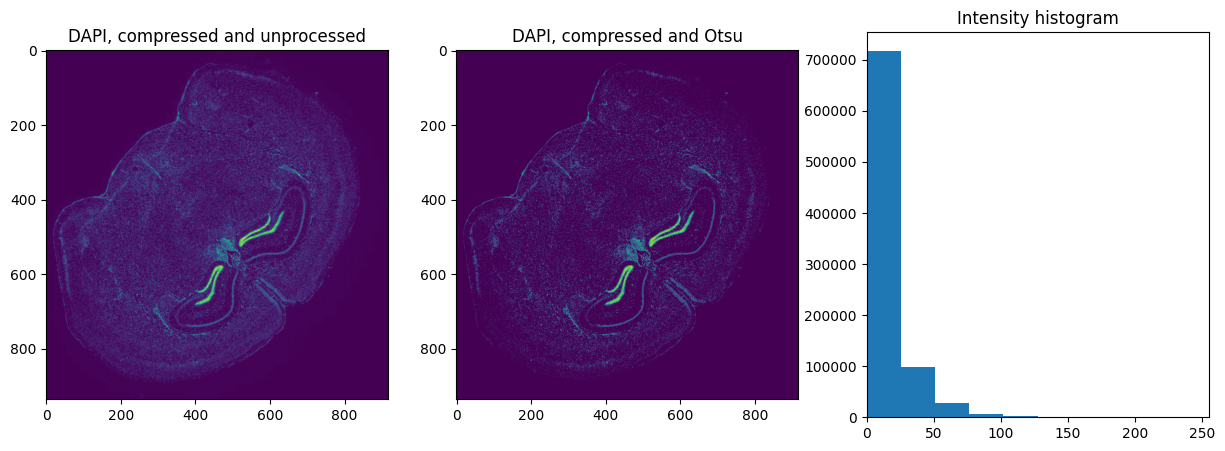

1296400318


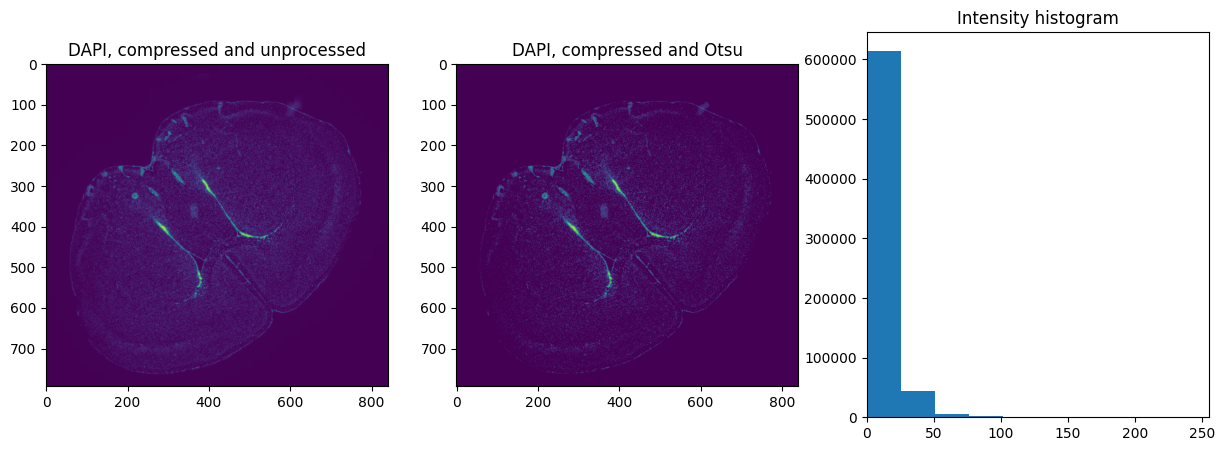

1199651057


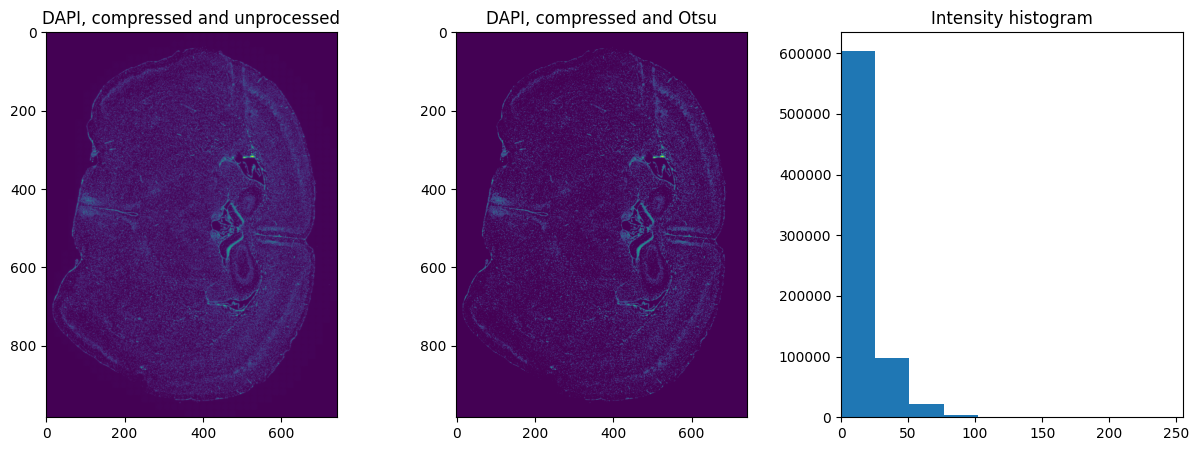

1233424675


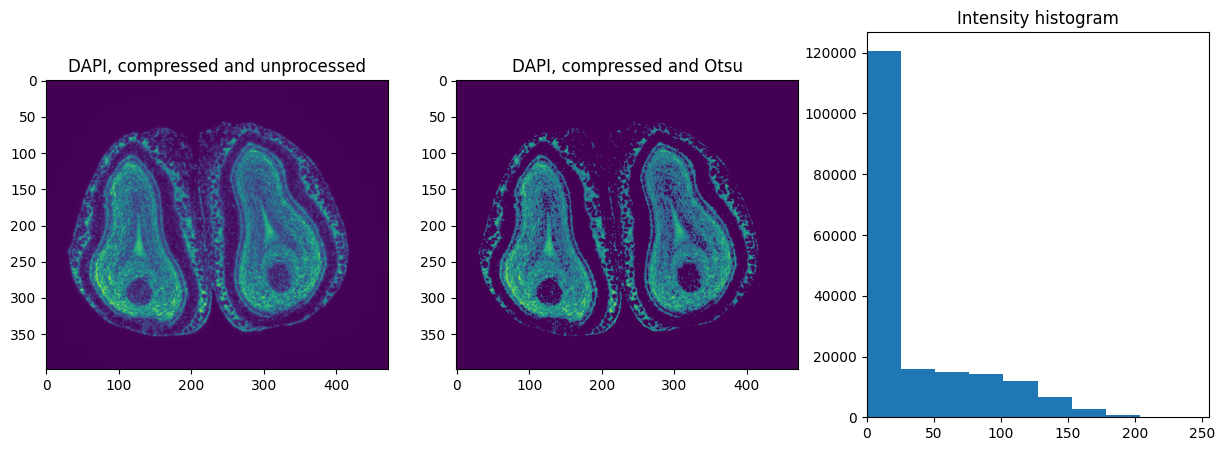

1288760945


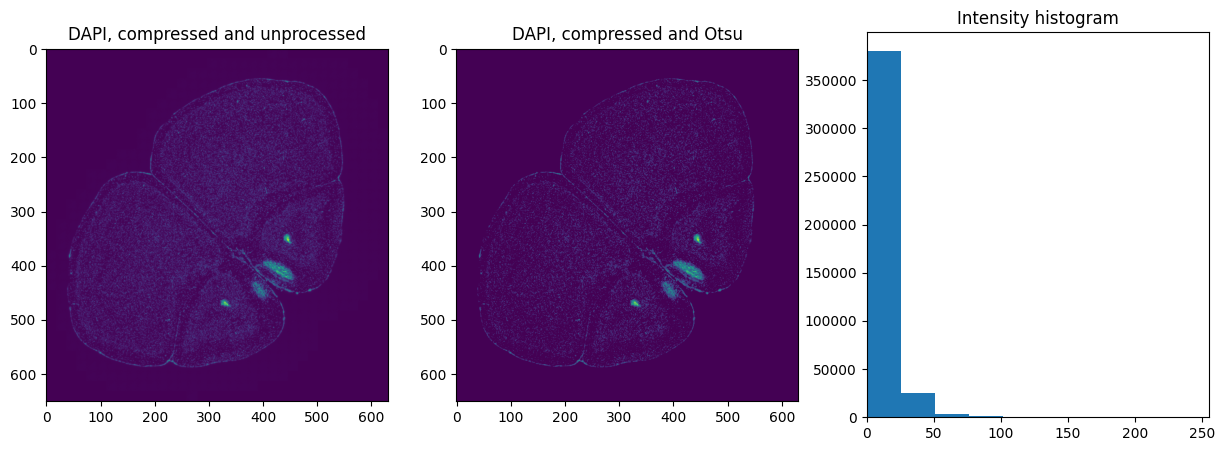

In [ ]:
random = np.random.choice(exps, 30, replace=False)

for barcode in random:
    if os.path.exists(f'/root/capsule/data/dev_mouse_data/{barcode}'):
        data_path = f'/root/capsule/data/dev_mouse_data/{barcode}/region_0'
    else:
        data_path = f'/root/capsule/data/mouse_atlas/{barcode}/region_0'
        
    dapi = dp.process_path(f'{data_path}/images/mosaic_DAPI_z0.tif')
    # Compress image by factor of 100
    dapi = pc.compress_image(dapi, bin_size=100)
    # Normalize pixel intensities back to (0, 255) ie convert to 8-bit for faster processing
    dapi = pc.normalize_intensities(dapi)
    # Otsu threshold
    threshold = threshold_otsu(dapi)
    dapi_threshold = np.where(dapi < threshold, 0, dapi)
    
    print(barcode)

    fig, ax = plt.subplots(1,3,figsize=(15,5))
    ax[0].imshow(dapi)
    ax[0].set_title("DAPI, compressed and unprocessed")
    ax[1].imshow(dapi_threshold)
    ax[1].set_title("DAPI, compressed and Otsu")
    ax[2].hist(dapi.flatten())
    ax[2].set_xlim(0,255)
    ax[2].set_title("Intensity histogram")

    plt.show()